<a href="https://www.kaggle.com/code/jondelacruz/global-internet-accessibility-analysis?scriptVersionId=254333781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Global Internet Accessibility Analysis

## 1. Introduction 
### 1.1. Objectives
This report presents the state of internet accessibility across the world by answering these specific questions:
|                |  
|:---------------|               
| ㅤ 1.	What are the **top five (5) countries** with the **highest internet use** (by population share)? How many **people had internet access** in those countries in **2019**?           | 
| ㅤ 2.	What are the **top five (5) countries** with the **highest internet use** for each of the following **regions**: **Africa Eastern and Southern**, **Africa Western and Central**, **Latin America & Caribbean**, **East Asia & Pacific**, **South Asia**, **North America**, and **European Union**? How do we **describe** these regions' **internet usage over time**?  | 
|ㅤ 3.	What are the **top five (5) countries** with the **most internet users**?   | 
|ㅤ 4.	What is the **correlation** between **internet usage** (population share) and **broadband subscriptions** for **2019**?         |  
| ㅤ               | 

### 1.2. Data Used

The following **tables** were used in the analyses, which are part of **[The World Bank's World Development Indicators (WDI)](https://databank.worldbank.org/source/world-development-indicators).**

_**Acknowledgments**: Max Roser, Hannah Ritchie, and Esteban Ortiz-Ospina (2015) - ["Internet." OurWorldInData.org.](https://ourworldindata.org/internet)_

#### 1.2.1. Internet
|Variable        |Description	                                                                        |
|:---------------|:-------------------------------------------------------------------------------------|                
| *Entity*         | Name of the country, region, or group                                                |
| *Code*           | Unique id for the country (null for other entities)                                  |
| *Year*           | Year from 1990 to 2019                                                               |
| *Internet_Usage* | Share of the entity's population who have used the internet in the last three months |

#### 1.2.2. People
|Variable                |Description	                                                                                     |
|:-----------------------|:--------------------------------------------------------------------------------------------------|     
| *Entity*  | Name of the country, region, or group                                                                   |
| *Code*    | Unique id for the country (null for other entities)                                                     |
| *Year*    | Year from 1990 to 2020                                                                                  |
| *Users*   | Number of people who have used the internet in the last three months for that country, region, or group |

#### 1.2.3. Broadband
|Variable                |Description	                                                                                     |
|:-----------------------|:--------------------------------------------------------------------------------------------------|     
| *Entity*                | Name of the country, region, or group                                                             |
| *Code*                   | Unique id for the country (null for other entities)                                               |
| *Year*                   | Year from 1998 to 2020                                                                            |
| *Broadband_Subscriptions* | Number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group |

In [1]:
## ---------- Pre-installed Packages and Datasets

# Load required libraries
suppressPackageStartupMessages(library(tidyverse)) 
suppressPackageStartupMessages(library(dplyr)) 
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(scales))

# Read the datasets from the CSV files
internet <- read_csv("/kaggle/input/the-data-setlist/internet.csv", show_col_types = FALSE)
people <- read_csv("/kaggle/input/the-data-setlist/people.csv", show_col_types = FALSE)
broadband <- read_csv("/kaggle/input/the-data-setlist/broadband.csv", show_col_types = FALSE)

# View the 'internet' data set
head(internet)

# View the 'people' data set
head(people)

# View the 'broadband' data set
head(broadband)

Entity,Code,Year,Internet_Usage
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1990,0
Afghanistan,AFG,1991,0
Afghanistan,AFG,1992,0
Afghanistan,AFG,1993,0
Afghanistan,AFG,1994,0
Afghanistan,AFG,1995,0


Entity,Code,Year,Users
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1990,0
Afghanistan,AFG,1991,0
Afghanistan,AFG,1992,0
Afghanistan,AFG,1993,0
Afghanistan,AFG,1994,0
Afghanistan,AFG,1995,0


Entity,Code,Year,Broadband_Subscriptions
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,2004,0.000808843
Afghanistan,AFG,2005,0.000857557
Afghanistan,AFG,2006,0.001891571
Afghanistan,AFG,2007,0.001844982
Afghanistan,AFG,2008,0.001803604
Afghanistan,AFG,2009,0.003521770


## 2. Results and Discussion
### 2.1. Countries with the highest internet use by population share
- Results show that **four (4)** out of the **top five (5) countries** with the **highest internet use** (by population share) are located in the **[Middle East](https://worldpopulationreview.com/country-rankings/middle-east-countries)**, which are **Bahrain**, **Qatar**, **Kuwait**, and **United Arab Emirates (UAE)**.

_**Note**: The **most recent 2019 data** was used for this comparison._

Country,Internet_Usage
<chr>,<chr>
Bahrain,99.70%
Qatar,99.65%
Kuwait,99.54%
United Arab Emirates,99.15%
Denmark,98.05%


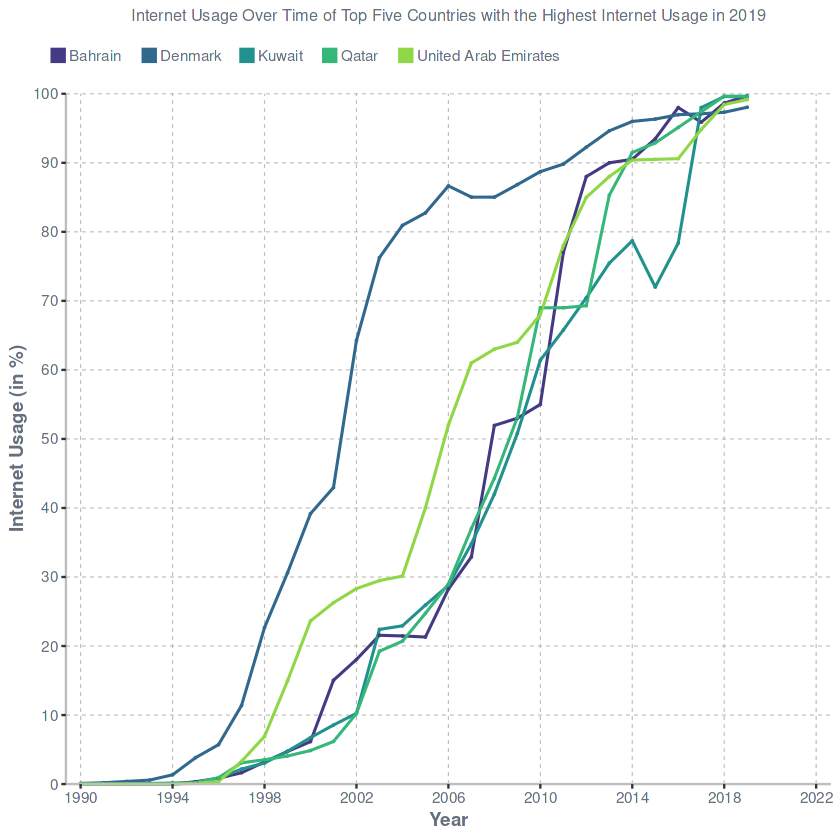

In [2]:
## ---------- Results and Discussion

# Top 5 countries with the highest internet use by population share
top_five_in_internet_use <- top_n(ungroup(
    internet %>%
    group_by(Entity) %>% 
	filter(Year == 2019) %>%
    arrange(desc(Internet_Usage))
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	select(-c("Code", "Year")) %>%
	rename(Country = Entity)
top_five_in_internet_use

for_plot_top_five <- internet %>%
	filter(Entity %in% top_five_in_internet_use$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Visualization in ggplot
internet_use_graph <- internet %>% filter(Entity %in% top_five_in_internet_use$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   linewidth = 0.5),
          panel.grid.major = element_line(color = "grey",
                                          linetype = "dashed",
                                          linewidth = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    size = 9.5)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five Countries with the Highest Internet Usage in 2019") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 100), 
                       breaks = seq(0, 100, by = 10)) +
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))

internet_use_graph

#### 2.1.1. Number of people that had internet access for these countries in 2019 
- Among these countries, **UAE** had the **highest number of internet users in 2019**.

In [3]:
# Number of internet users in 2019 of the countries with the highest internet use by population share
top_five_in_internet_use_users_2019 <- people %>% 
	filter(Entity %in% top_five_in_internet_use$Country, Year == 2019) %>%
	arrange(desc(Users)) %>% 
	mutate(Users = comma_format()(Users)) %>%
	rename(Country = Entity, Number_of_Internet_Users = Users) %>%
	select(-c("Code", "Year"))
top_five_in_internet_use_users_2019

for_graph_top_five_in_internet_use_users_2019 <- people %>%
	filter(Entity %in% top_five_in_internet_use$Country, Year == 2019) %>%
	arrange(desc(Users)) %>%
	rename (Country = Entity, "Number of Internet Users" = Users) %>%
	select(-c("Code", "Year"))

Country,Number_of_Internet_Users
<chr>,<chr>
United Arab Emirates,"9,133,361"
Denmark,"5,682,653"
Kuwait,"4,420,795"
Qatar,"2,797,495"
Bahrain,"1,489,735"


### 2.2. Countries with the highest internet use by population share per region 

- **Seychelles** (Africa Eastern and Southern), **Cape Verde** (Africa Western and Central), **Aruba** (Latin America & Caribbean), **South Korea** (East Asia & Pacific), **Maldives** (South Asia), **Bermuda** (North America), and **Luxembourg** (European Union) are the **top countries with highest internet use per region**.
- Considerably, these countries are **not the largest** when it comes to the **[size of land](https://www.worldometers.info/geography/largest-countries-in-the-world/)** as compared to others.

_**Note**: The **2017 data** was used for each region's comparison as it is the **most recent year** with the **most available country data**._

In [4]:
# Install & load the "countrycode" package for identifying countries' regions
suppressMessages(install.packages("countrycode", verbose = TRUE, quiet = TRUE))
library(countrycode)

# The 'region' destination (7 Regions as defined in the World Bank Development Indicators) was used for Latin America & Caribbean, East Asia & Pacific, South Asia, and North America.
code_region <- distinct(data.frame( Code = (internet %>% filter(Code != 'null'))$Code, 
               		Region = countrycode((internet %>% filter(Code != 'null'))$Code, 
                  		'wb', 'region')), Code, .keep_all = TRUE) %>% 
				  		filter(Code != 'OWID_WRL') %>%
			     		mutate(Region = ifelse(Code == 'OWID_KOS', 'Europe & Central Asia', Region)) 

# The 'region23' destination (23 Regions as used to be in the World Bank Development Indicators) was used for Africa Eastern and Southern and Africa Western and Central.
code_region23 <- distinct(data.frame(Code = (internet %>% filter(Code != 'null'))$Code, 
                 	Region = countrycode((internet %>% filter(Code != 'null'))$Code, 
                  		'wb', 'region23')), Code, .keep_all = TRUE) %>%
				  		filter(Code != 'OWID_WRL') %>%
			     		mutate(Region = ifelse(Code == 'OWID_KOS', 'Southern Europe', Region)) 

# Join 'Code' from 'internet' to 'code_region' and 'code_region23' tables to identify a country's region
internet_with_region <- merge(internet, code_region, by = 'Code', all = TRUE)
internet_with_region23 <- merge(internet, code_region23, by = 'Code', all = TRUE)

# The country Kosovo was not matched**, so its regions(https://data.worldbank.org/country/XK) was inputted manually. 
# The row with a Code = 'OWID_WRL' for World was excluded in the analysis.
# Since the European Union region is incompatible with this approach, a different data source was employed.

Warning message:
“Some values were not matched unambiguously: OWID_KOS, OWID_WRL
”
Warning message:
“Some values were not matched unambiguously: OWID_KOS, OWID_WRL
”


#### 2.2.1. Africa Eastern and Southern

Country,Internet_Usage
<chr>,<chr>
Seychelles,58.77%
South Africa,56.17%
Djibouti,55.68%
Mauritius,55.40%
Botswana,41.41%


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


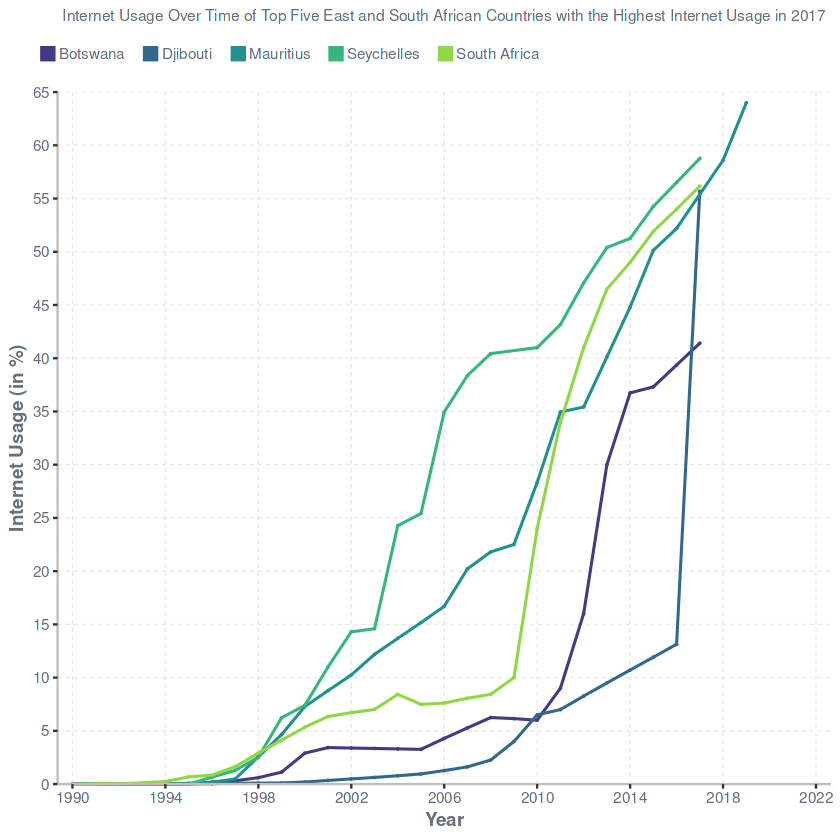

In [5]:
# Africa Eastern and Southern
top_five_in_internet_use_aes <- top_n(ungroup(
    internet_with_region23 %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region %in% c('Eastern Africa', 'Southern Africa')) %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename(Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_aes

for_plot_top_five_aes <- internet %>%
	filter(Entity %in% top_five_in_internet_use_aes$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Visualization in ggplot
internet_use_aes_graph <- internet %>% 
	filter(Entity %in% top_five_in_internet_use_aes$Country) %>%
	ggplot(aes(x = Year, 
			   y = Internet_Usage,
			   group = Entity)) + 
		geom_line(aes(color = Entity),
					  linewidth = 0.65) +
		geom_point(aes(color = Entity), 
					   size = 0) +
		theme(legend.position = "top",
			  legend.justification = -0.12,
			  legend.direction = "horizontal",
			  legend.key.size = unit(0, 'pt'),
			  legend.text = element_text(margin = margin(r = 5, unit = "pt"),
										 color = "#65707C"),
			  legend.title = element_blank(),
			  legend.key = element_blank(),
			  axis.title = element_text(color = "#65707C",
										face = "bold"),
			  axis.text = element_text(color = "#65707C"),
			  axis.line = element_line(colour = "grey",
									   linewidth = 0.5),
			  panel.grid.major = element_line(color = "grey90",
											  linetype = "dashed",
											  size = 0.25),
			  panel.background = element_blank(),
			  plot.title = element_text(color = "#65707C",
										hjust = 0.5,
										size = 8.99)) +
		labs(x = 'Year', y = 'Internet Usage (in %)', 
			 color = 'Country') +
		ggtitle("Internet Usage Over Time of Top Five East and South African Countries with the Highest Internet Usage in 2017") +
		scale_x_continuous(expand = c(0.02, 0),
						   limits = c(1990, 2022), 
						   breaks = seq(1990, 2022, by = 4)) +
		scale_y_continuous(expand = c(0, 0),
						   limits = c(0, 65), 
						   breaks = seq(0, 65, by = 5)) +
		scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
		guides(color = guide_legend(override.aes = list(
							 shape = 15,
							 size = 4,
							 linetype = "blank")))
internet_use_aes_graph

#### 2.2.2. Africa Western and Central 

Country,Internet_Usage
<chr>,<chr>
Cape Verde,57.16%
Gabon,50.32%
Cote d'Ivoire,43.84%
Ghana,37.88%
Sao Tome and Principe,29.93%


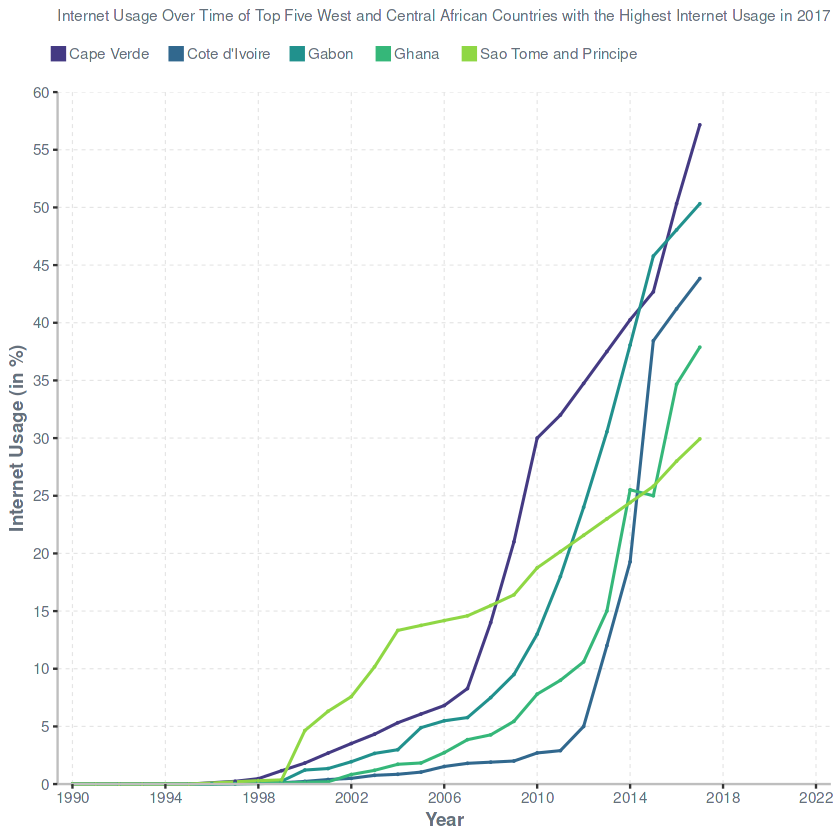

In [6]:
# Africa Western and Central
top_five_in_internet_use_awc <- top_n(ungroup(
    internet_with_region23 %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region %in% c('Western Africa', 'Middle Africa')) %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_awc

for_plot_top_five_awc <- internet %>%
	filter(Entity %in% top_five_in_internet_use_awc$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Visualization in ggplot
internet_use_awc_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_awc$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size=0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    size = 8.95)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five West and Central African Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 60), 
                       breaks = seq(0, 60, by = 5)) +
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_awc_graph

#### 2.2.3. Latin America & Caribbean 

Country,Internet_Usage
<chr>,<chr>
Aruba,97.17%
Chile,82.33%
Barbados,81.76%
Cayman Islands,81.07%
Saint Kitts and Nevis,80.71%


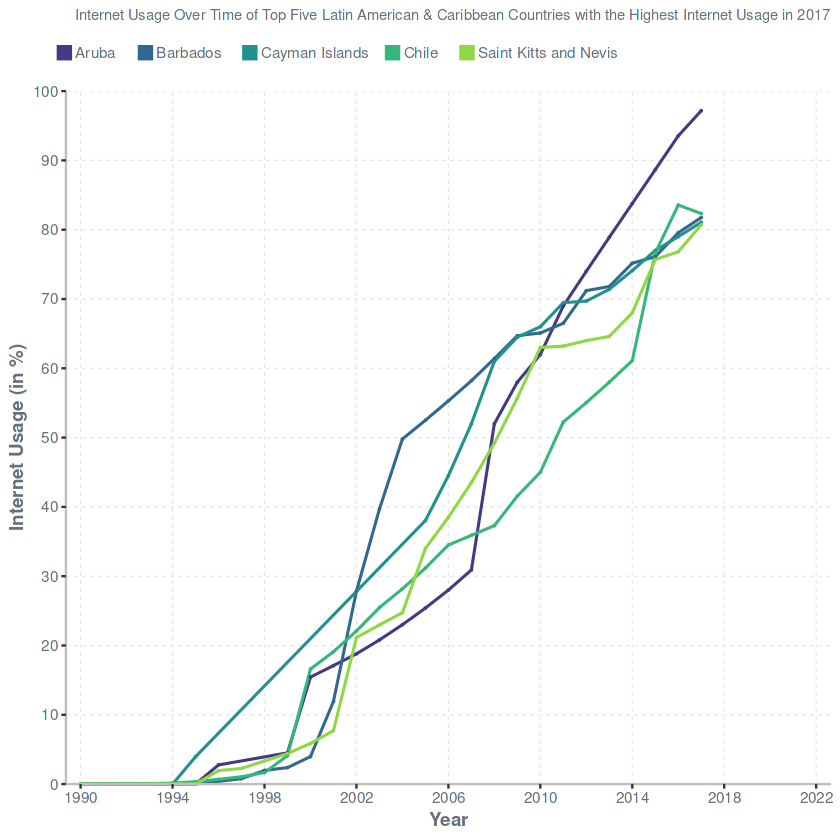

In [7]:
# Latin America & Caribbean
top_five_in_internet_use_lac <- top_n(ungroup(
    internet_with_region %>%
    distinct(Internet_Usage, .keep_all = TRUE) %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'Latin America & Caribbean') %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_lac

for_plot_top_five_lac <- internet %>%
	filter(Entity %in% top_five_in_internet_use_lac$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Region's line graphs of internet usage over time
internet_use_lac_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_lac$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.9,
                                    size = 8.49)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five Latin American & Caribbean Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 100), 
                       breaks = seq(0, 100, by = 10)) +
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_lac_graph

#### 2.2.4. East Asia & Pacific 

Country,Internet_Usage
<chr>,<chr>
South Korea,95.07%
Brunei,94.87%
Japan,91.73%
New Zealand,90.81%
Hong Kong,89.42%


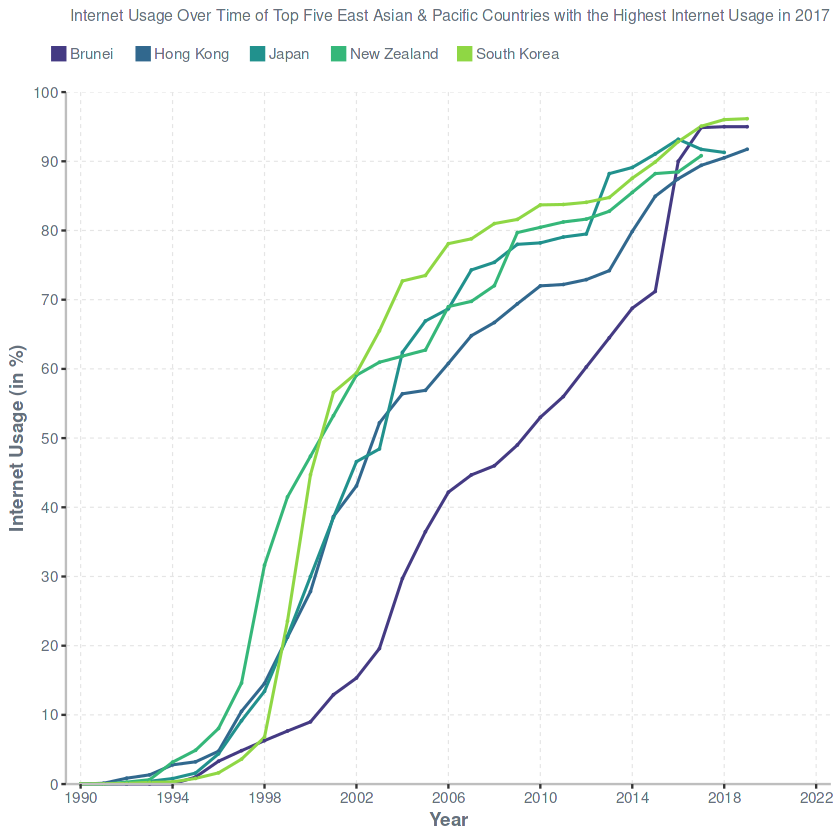

In [8]:
# East Asia & Pacific 
top_five_in_internet_use_eap <- top_n(ungroup(
    internet_with_region %>%
    group_by(Entity) %>% 
    distinct(Internet_Usage, .keep_all = TRUE) %>%
	filter(Year == 2017, Region == 'East Asia & Pacific') %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_eap

for_plot_top_five_eap <- internet %>%
	filter(Entity %in% top_five_in_internet_use_eap$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Region's line graphs of internet usage over time
internet_use_eap_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_eap$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.9,
                                    size = 9.2)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five East Asian & Pacific Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 100), 
                       breaks = seq(0, 100, by = 10)) +
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_eap_graph

#### 2.2.5. South Asia 

Country,Internet_Usage
<chr>,<chr>
Maldives,63.19%
Sri Lanka,34.11%
India,32.00%
Nepal,21.40%
Pakistan,17.11%


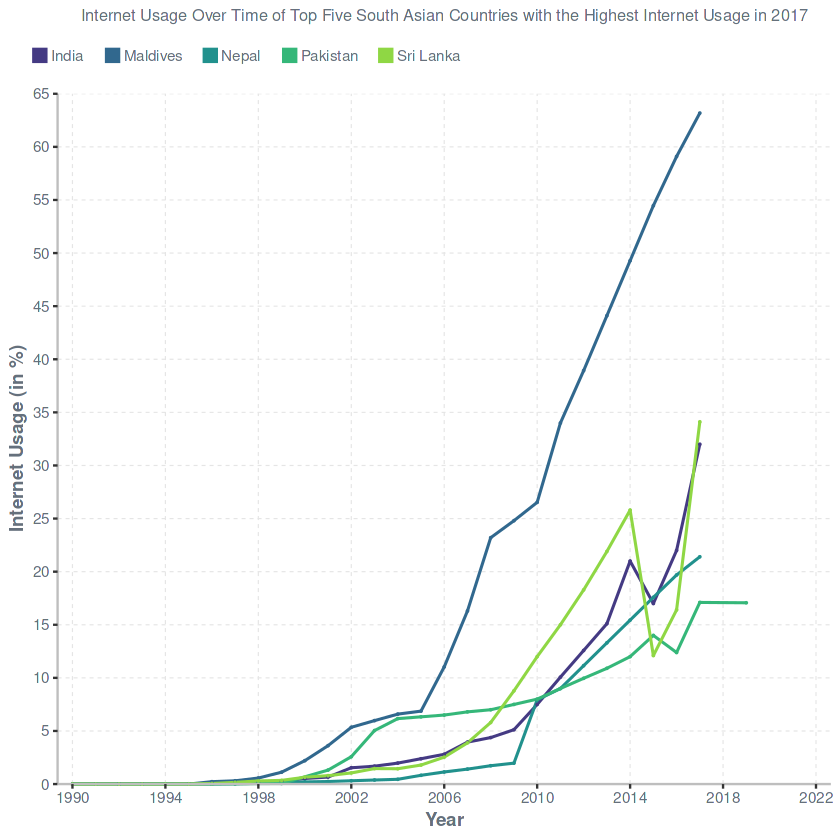

In [9]:
# South Asia
top_five_in_internet_use_sa <- top_n(ungroup(
    internet_with_region %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'South Asia') %>%
    arrange(desc(Internet_Usage))
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_sa

for_plot_top_five_sa <- internet %>%
	filter(Entity %in% top_five_in_internet_use_sa$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Region's line graphs of internet usage over time
internet_use_sa_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_sa$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
									hjust = 0.5,
                                    size = 9.5)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five South Asian Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 65), 
                       breaks = seq(0, 65, by = 5)) +
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_sa_graph

#### 2.2.6. North America

Country,Internet_Usage
<chr>,<chr>
Bermuda,98.37%
Canada,92.70%
United States,87.27%


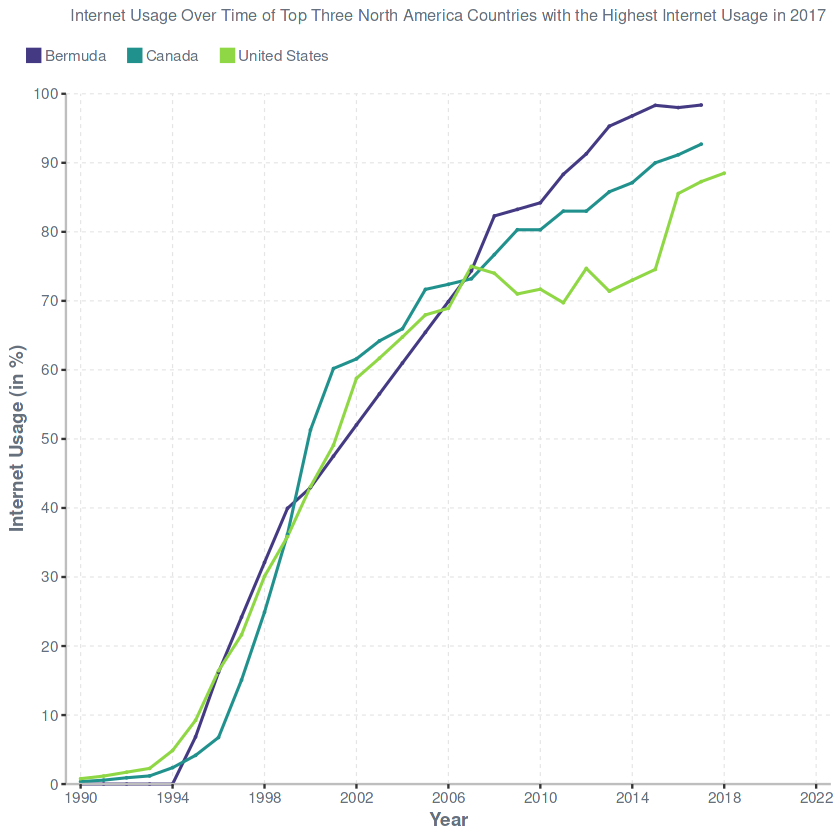

In [10]:
# North America
top_five_in_internet_use_na <- top_n(ungroup(
    internet_with_region %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'North America') %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_na

for_plot_top_five_na <- internet %>%
	filter(Entity %in% top_five_in_internet_use_na$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Region's line graphs of internet usage over time
internet_use_na_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_na$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key = element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
									hjust = 0.5,
                                    size = 9.5)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Three North America Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 100), 
                       breaks = seq(0, 100, by = 10)) +
    scale_color_manual(values = c("#443A83", "#21918D", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_na_graph

#### 2.2.7. European Union

Country,Internet_Usage
<chr>,<chr>
Luxembourg,97.36%
Denmark,97.10%
Netherlands,93.20%
Sweden,93.01%
Estonia,88.10%


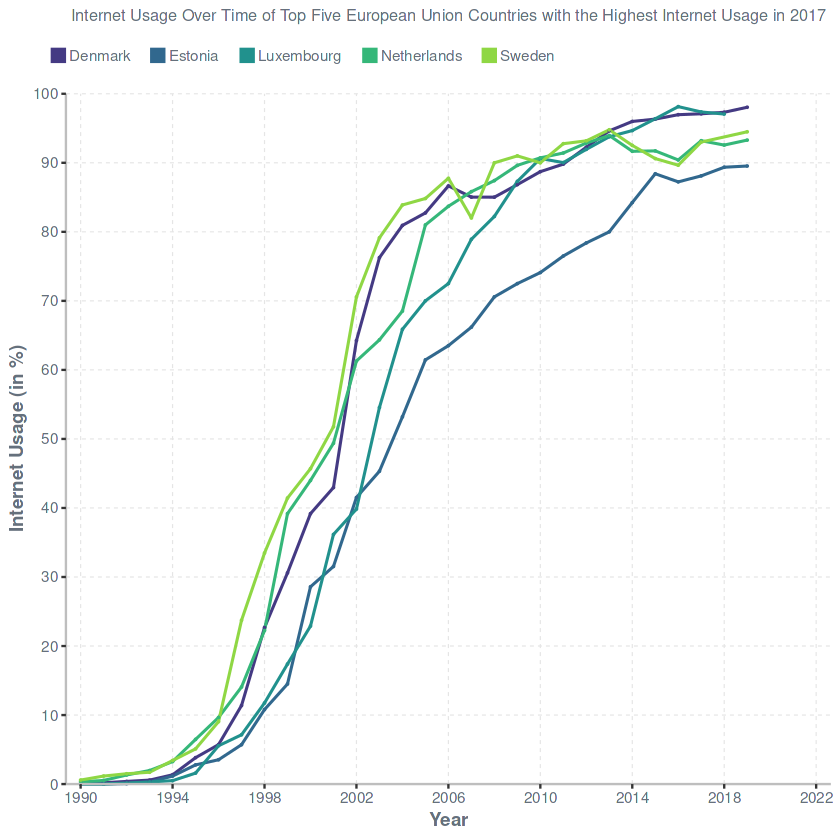

In [11]:
# EU country codes
EUCodes <- data.frame(
	Code = c('AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN',	'IRL', 'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE'),
	Region = replicate(27, 'European Union')
)

# https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=141329
# This list was used for the country codes. As of writing, there are only twenty-seven (27) members (https://european-union.europa.eu/principles-countries-history/country-profiles_en), which means that United Kingdom was excluded from after formally leaving in 2020 (https://www.ema.europa.eu/en/about-us/history-ema/brexit-united-kingdoms-withdrawal-european-union).

# Join 'Code' from the internet and EUCodes tables to identify a country's region 
internet_eu <- merge(internet, EUCodes, by = 'Code', all = TRUE) %>%
	filter(Region == 'European Union')

# European Union
top_five_in_internet_use_eu <- top_n(ungroup(
    internet_eu %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Region == 'European Union') %>%
    arrange(desc(Internet_Usage)) 
	), 5, Internet_Usage) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Country = Entity) %>%
	select(-c("Code", "Year", "Region"))
top_five_in_internet_use_eu

for_plot_top_five_eu <- internet %>%
	filter(Entity %in% top_five_in_internet_use_eu$Country) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Country = Entity)

# Region's line graphs of internet usage over time
internet_use_eu_graph <- internet %>% filter(Entity %in% top_five_in_internet_use_eu$Country) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = -0.12,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key=element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
									hjust = 0.5,
                                    size = 9.48)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of Top Five European Union Countries with the Highest Internet Usage in 2017") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 100), 
                       breaks = seq(0, 100, by = 10)) + 
    scale_color_manual(values = c("#443A83", "#31688E", "#21918D", "#35B779", "#8FD744")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_eu_graph

### 2.3. Internet usage over time for these regions

- **North America** and **European Union** have **significantly the highest share of individuals who have used the internet** among the seven regions. We can observe from the graph their **immensely rapid increase** in **internet usage over time**.
- **Latin America & Caribbean** and **East Asia & Pacific** comes in **third** and **fourth**, respectively, with their internet usages having **small deviations** over time.
- The last three regions, **South Asia**, **Africa Western and Central**, and **Africa Eastern and Southern**, were the **lowest** in terms of internet usage and **slowest** in terms of increase over time.

_**Note**: The **2015 data** was used for **'Africa Western and Central'**, while **rest of the regions** have their **2017 data**._

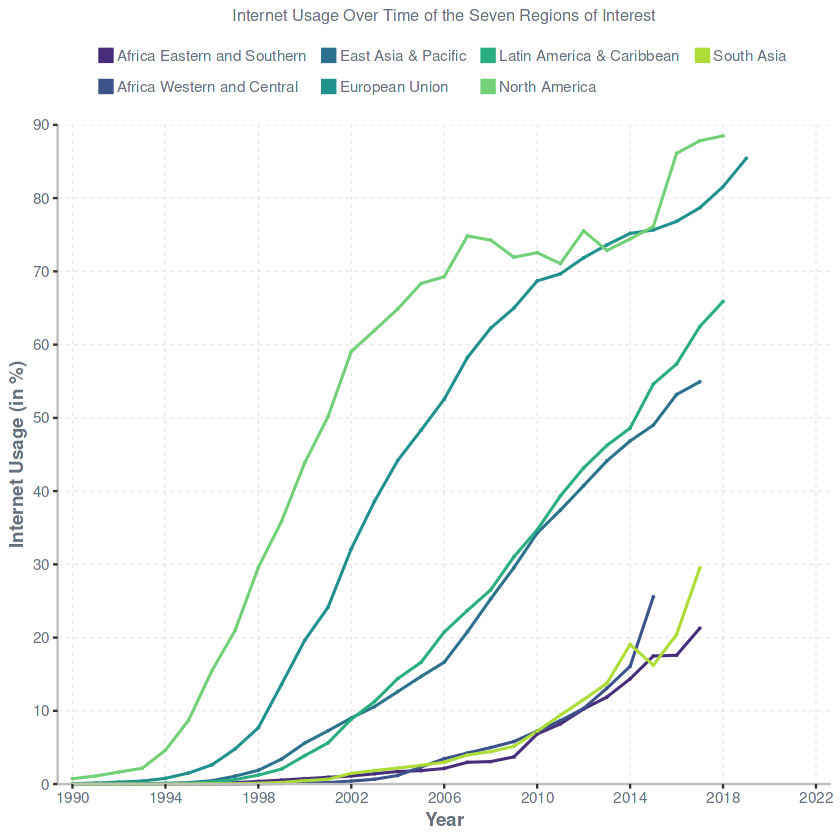

In [12]:
# Top five countries per region
highlights <- rbind(top_five_in_internet_use_aes,
                    top_five_in_internet_use_awc,
                    top_five_in_internet_use_lac,
                    top_five_in_internet_use_eap, 
                    top_five_in_internet_use_sa,
                    top_five_in_internet_use_na,
                    top_five_in_internet_use_eu)

# Top country per region
top_countries <- c('Seychelles', 'Cape Verde', 'Aruba', 'South Korea', 'Maldives', 'Bermuda', 'Luxembourg')

# Internet usage for all countries in the regions of interest
countries_for_region_of_interest <- rbind(
internet_with_region %>% 
	group_by(Entity) %>% 
	filter(Region %in% c('Latin America & Caribbean', 
                         'East Asia & Pacific', 
                         'South Asia', 
                         'North America')),
internet_with_region23 %>% 
	group_by(Entity) %>% 
	filter(Region %in% c('Eastern Africa', 
                         'Southern Africa', 
                         'Western Africa',  
                         'Middle Africa')) %>%
    mutate(Region = ifelse(Region %in% c('Eastern Africa','Southern Africa'),
                          	'Africa Eastern and Southern', 'Africa Western and Central')),
internet_eu %>% group_by(Entity)
)

# Install & load the "ggrepel" package to repel overlapping text labels
suppressWarnings(suppressMessages(install.packages("ggrepel", verbose = TRUE, quiet = TRUE))) 
suppressPackageStartupMessages(library(ggrepel))     
                 
# Visualization
internet_use_regions_graph_with_labels <- ggplot(data = countries_for_region_of_interest, 
    aes(x = Year, y = Internet_Usage, group = Entity)) + 
    geom_line(color = 'grey75',
              alpha = 0.5) +
	geom_line(data = subset(countries_for_region_of_interest, Entity %in% highlights$Country),
              aes(color = Region), 
              linewidth = 0.6) +
	geom_point(data = subset(countries_for_region_of_interest, Entity %in% highlights$Country),
               aes(color = Region), 
               size = 0.65, 
               alpha = 0.5) +
	geom_line(data = subset(countries_for_region_of_interest, Entity %in% top_countries),
                color = 'grey25', 
                linewidth = 0.65) +
	geom_text_repel(data = subset(countries_for_region_of_interest, Entity %in% top_countries) %>%
                    	group_by(Entity) %>% filter(Year == max(Year)),
                    aes(label = Entity, x = Inf, y = Internet_Usage), 
                    color = 'black', 
                    alpha = 0.75) +
	facet_wrap(~Region, scales = 'free_x') +
	theme_minimal() +
	theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          strip.text = element_text(size = 7.5),
          panel.spacing.x = unit(10, "mm"),
          panel.spacing.y = unit(10, "mm"),
          plot.margin = margin(1, 1, 1, 1, "cm"),
          plot.title = element_text(colour = 'grey25', 
                                    face = "bold", 
                                    hjust = 0.5)) +
	labs(x = 'Year', y = 'Internet Use (by population share)') +
	ggtitle('Countries With the Highest Internet Usage Over Time Per Region') +
	scale_x_continuous(limits = c(1990, 2019)) +
	scale_y_continuous(labels = unit_format(unit = '%')) +
	guides(colour = "none")


# Most recent data for the 'Africa Western and Central' region
most_recent_awc <- internet %>%
	group_by(Entity) %>% 
	filter(Year == 2015, Entity == 'Africa Western and Central')

# Seven regions' internet usages in 2017
internet_of_regions <- internet %>%
    group_by(Entity) %>% 
	filter(Year == 2017, Entity %in% countries_for_region_of_interest$Region) %>%
	bind_rows(most_recent_awc) %>%
    arrange(desc(Internet_Usage)) %>%
	mutate(Internet_Usage = label_percent(accuracy = 0.01)(Internet_Usage/100)) %>%
	rename (Region = Entity) %>%
	select(-c("Code", "Year")) %>%
	ungroup()

# Seven regions' internet usages in 1990 to 2020
plot_region_internet <- internet %>%
	filter(Entity %in% countries_for_region_of_interest$Region) %>%
	rename(`Internet Usage (in %)` = Internet_Usage, 
           Region = Entity)

# Regions' line graphs of internet usage over time
internet_use_regions_graph <- internet %>% filter(Entity %in% countries_for_region_of_interest$Region) %>%
ggplot(aes(x = Year, 
           y = Internet_Usage,
           group = Entity)) + 
	geom_line(aes(color = Entity),
            	  linewidth = 0.65) +
	geom_point(aes(color = Entity), 
                   size = 0) +
	theme(legend.position = "top",
          legend.justification = 0.5,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 6, unit = "pt"),
                                     color = "#65707C"),
          legend.title = element_blank(),
          legend.key=element_blank(),
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   size = 0.5),
          panel.grid.major = element_line(color = "grey90",
                                          linetype = "dashed",
                                          size = 0.25),
          panel.background = element_blank(),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    size = 9.5)) +
	labs(x = 'Year', y = 'Internet Usage (in %)', 
         color = 'Country') +
	ggtitle("Internet Usage Over Time of the Seven Regions of Interest") +
	scale_x_continuous(expand = c(0.02, 0),
                       limits = c(1990, 2022), 
                       breaks = seq(1990, 2022, by = 4)) +
	scale_y_continuous(expand = c(0, 0),
                       limits = c(0, 90), 
                       breaks = seq(0, 90, by = 10)) +
    scale_color_manual(values = c("#472D7B", "#3B528B", "#2C728E", "#21918D", "#28AE80", "#72D077", "#ACDC35")) +
    guides(color = guide_legend(override.aes = list(
        				 shape = 15,
        				 size = 4,
                         linetype = "blank")))
internet_use_regions_graph

### 2.4. Countries with the most internet users
- Based on the **[World Population Review](https://worldpopulationreview.com/countries)**, **all of these countries** are part of the **top ten (10) most populated countries**, while **four (4)** are part of the **top five (5)** (excluding Brazil).

Country,Number_of_Internet_Users
<chr>,<chr>
China,"1,003,218,650"
India,"600,446,441"
United States,"305,371,298"
Brazil,"173,419,624"
Indonesia,"146,059,763"


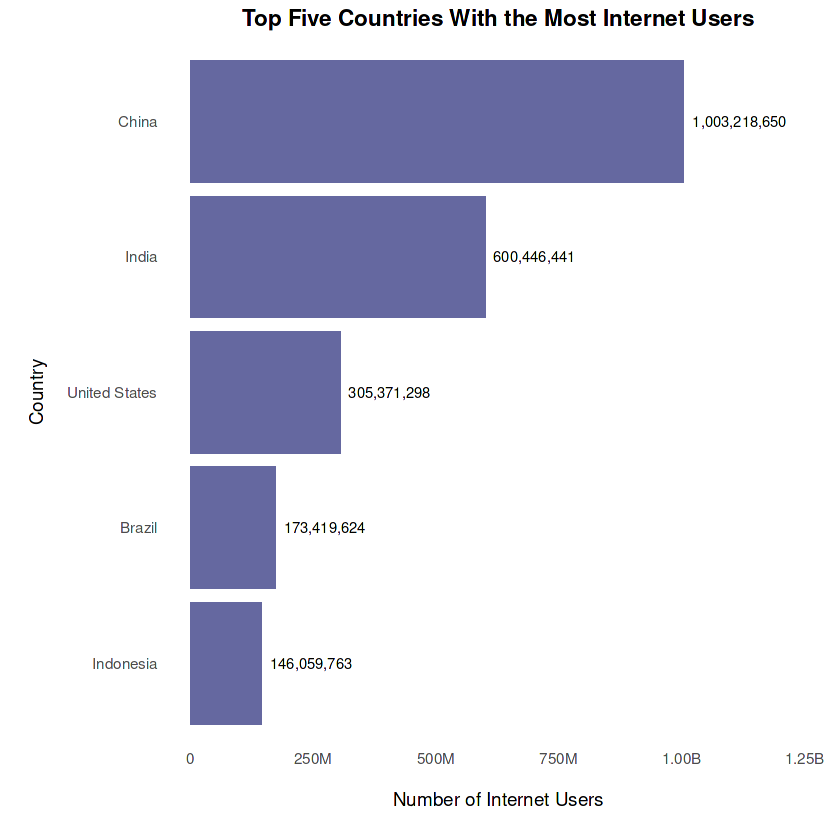

In [13]:
# Top five countries with the most internet users
top_five_in_internet_users <- top_n(ungroup(people %>% group_by(Entity) %>% 
	filter(Year == max(Year), Code != 'null', Entity != 'World') %>%
    arrange(desc(Users))
	), 5, Users) %>%
	mutate(Users = comma_format()(Users)) %>%
	rename(Country = Entity, Number_of_Internet_Users = Users) %>%
	select(-c("Code", "Year"))
top_five_in_internet_users

for_graph <- top_n(ungroup(people %>% group_by(Entity) %>% 
	filter(Year == max(Year), Code != 'null', Entity != 'World') %>%
    arrange(desc(Users))
	), 5, Users) %>%
	rename(`Number of Internet Users` = Users,
           Country = Entity)

# Visualization
bar_graph_top_five_in_internet_users <- ggplot(for_graph, aes(x = fct_reorder(Country, `Number of Internet Users`),
                                       y = `Number of Internet Users`)) + 
    geom_col(fill = "#6568A0") +
	coord_flip() +
	geom_text(aes(label = comma_format()(`Number of Internet Users`),
                        x = Country, y = `Number of Internet Users`),
              hjust = -0.1, size = 3.0
             ) +
	theme_minimal() +
	theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          plot.title = element_text(face = "bold",
                                    hjust = 0.5)) +
	labs(x = '\nCountry\n', y = '\nNumber of Internet Users\n') + 
	ggtitle('Top Five Countries With the Most Internet Users') + 
	scale_y_continuous(labels = scales::label_number(scale_cut = cut_short_scale()), expand = expansion(mult = c(0.05, 0.30)))
bar_graph_top_five_in_internet_users

### 2.5. Correlation between internet usage and broadband subscriptions for 2019

- There is a **[moderately high positive correlation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/table/T1/?report=objectonly)** of **0.56** between **internet usage** and **broadband subscriptions** in **2019**.
- At a **significance level of 0.05**, we **reject** the **null hypothesis** suggesting **no true correlation (ρ)**, because the **p-value of 4.914e-07 is less than 0.05**. We are **95% confident** that the **value of ρ** is **within 0.3730** and **0.7018**.
- The scatter plot below also shows a seemingly linear positive relationship between the two variables.

,Correlation_Coefficient,P,CI_Lower,CI_Upper
,<dbl>,<dbl>,<dbl>,<dbl>
Value,0.5590077,4.913904e-07,0.3730323,0.7017988


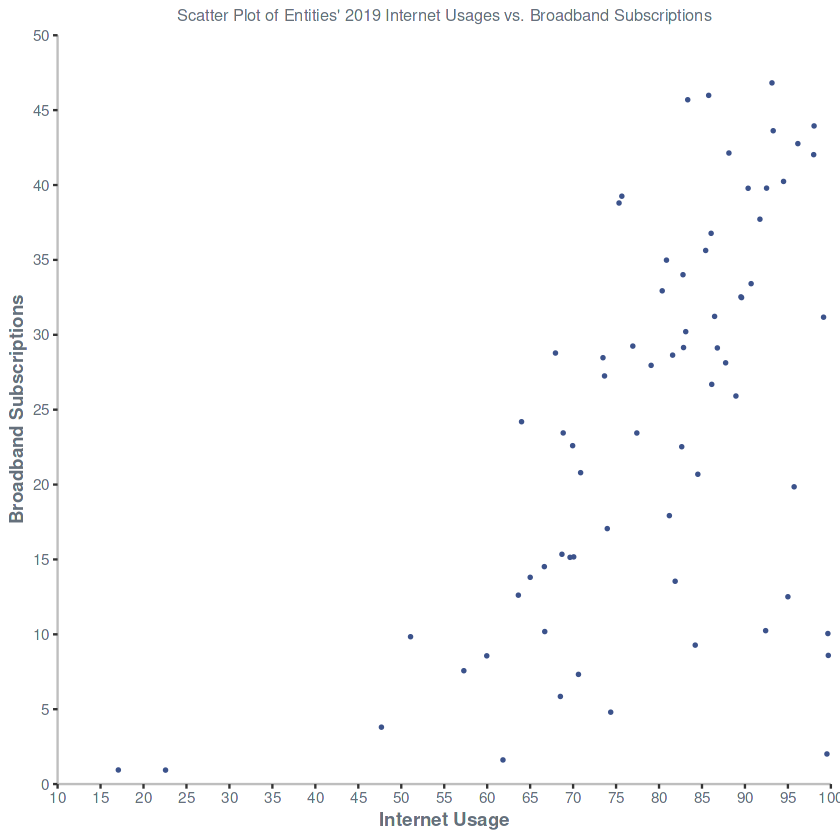

In [14]:
# Join 'internet' and 'broadband' tables
internet_and_broadband_2019 <- internet %>% 
	inner_join(broadband, by = c("Entity", "Code", "Year")) %>%
    filter(Year == 2019) %>%
	rename(`Internet Usage` = Internet_Usage,
		   `Broadband Subscriptions` = Broadband_Subscriptions)

# Perform a Pearson correlation test
pearson_corr <- data.frame(
	Correlation_Coefficient = cor.test(internet_and_broadband_2019$`Internet Usage`,
                        internet_and_broadband_2019$`Broadband Subscriptions`,
                        method = "pearson")$estimate,
	P=cor.test(internet_and_broadband_2019$`Internet Usage`,
                     internet_and_broadband_2019$`Broadband Subscriptions`,
                     method = "pearson")$p.value,
	CI_Lower=(cor.test(internet_and_broadband_2019$`Internet Usage`,
                       internet_and_broadband_2019$`Broadband Subscriptions`,
                       method = "pearson")$conf.int)[1],
	CI_Upper=(cor.test(internet_and_broadband_2019$`Internet Usage`,
                       internet_and_broadband_2019$`Broadband Subscriptions`,
                       method = "pearson")$conf.int)[2]	
)

rownames(pearson_corr) <- "Value"

pearson_corr

# Visualize a scatter plot
scatter_for_corr <- ggplot(internet_and_broadband_2019, aes(x = `Internet Usage`, y = `Broadband Subscriptions`)) +
	geom_point(color = "#3B528B", size = 0.5) +
	theme(legend.position = "top",
    	  legend.justification = -3.2,
          legend.direction = "horizontal",
          legend.key.size = unit(0, 'pt'),
          legend.text = element_text(margin = margin(r = 5, unit = "pt"),
        	                         color = "#65707C"),
          legend.title = element_text(color = "#65707C",
                                      size = 8.5),
          legend.key = element_blank(),
          strip.text = element_blank(),   	
          axis.title = element_text(color = "#65707C",
                                    face = "bold"),
          axis.text = element_text(color = "#65707C"),
          axis.line = element_line(colour = "grey",
                                   linewidth = 0.5),
          panel.grid.major = element_blank(),
          panel.background = element_blank(),
          panel.border = element_blank(),  
          panel.spacing = unit(2, "lines"),
          plot.title = element_text(color = "#65707C",
                                    hjust = 0.5,
                                    size = 9.5)) +
	labs(x = 'Internet Usage', y = 'Broadband Subscriptions') +
	ggtitle("Scatter Plot of Entities' 2019 Internet Usages vs. Broadband Subscriptions") +
	scale_x_continuous(expand = c(0.00, 0),
                       limits = c(10, 100), 
                       breaks = seq(10, 100, by = 5)) +
	scale_y_continuous(expand = c(0.00, 0),
                       limits = c(0, 50),
                       breaks = seq(0, 50, by = 5))
scatter_for_corr

## 3. Conclusions
Using the available data and results of their analyses, the following conclusions can be drawn about the global state of internet accessibility:

- Several **Middle Eastern countries** have the **highest internet usage** by population share in the world.
- **Western world regions** experienced a **much quicker growth in internet accessibility** than its eastern counterparts.
- **Top countries per region** in terms of **internet usage** may **not have large land areas**.
- On the other hand, **top countries in the highest population ranking** will likely have the **greatest number of internet users**.
- **Entities** with **increased percentage of internet users** in their population had **increased fixed subscriptions** to high-speed internet at downstream speeds >= 256 kbit/s in **2019**.